In [1]:
%matplotlib inline
import os
from visualize import PyramidVisualizer, get_dataset, display_image
from metroem.aligner import Aligner

/home/thomas_macrina/anaconda3/envs/metroem/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
import torch; assert(torch.cuda.is_available())

In [7]:
data_dir = "/home/thomas_macrina/data/m6/"
dataset_mip = 6
stage = 1
checkpoint_name = 'test_no_batchnorm'
crop_mode = None
checkpoint_folder = "/home/thomas_macrina/models/fly_m6/1_mip6in_mip7module/model"

pyramid = Aligner(checkpoint_folder,
                    checkpoint_name=checkpoint_name,
                    train=False,
                    finetune_lr=3e-1,
                    finetune_sm=300e0,
                    finetune_iter=400,
                    finetune=True)
dataset = get_dataset(data_dir=data_dir, 
                    dataset_mip=dataset_mip, 
                    stage=stage, 
                    checkpoint_name=checkpoint_name, 
                    crop_mode=crop_mode)
viz = PyramidVisualizer(pyramid=pyramid, 
                    dataset_mip=dataset_mip, 
                    dataset=dataset)

/home/thomas_macrina/models/fly_m6/1_mip6in_mip7module/model/model_spec.json
block_6convs_fms8to32_skip25.json
categorical/categorical_compch15_gridfalse_maxvalue7_outch2_stepnull_trainsttrue.json
identity.json
embedder_m0_3x3_fms3x.json
block_5convs_3x3_fms1to3_skip14.json
average_pool.json
embedder_fms4to3.json
block_3convs_3x3_fms4to32to3.json
average_pool.json
block_3convs_3x3_fms3to32to3.json
identity.json
identity.json
identity.json
upsample_residuals.json
identity.json
Adding 'x67584_y20352_z4958' dataset.
Loading file '/home/thomas_macrina/data/m6/x67584_y20352_z4958_MIP6.h5...'
Loading file '/home/thomas_macrina/data/m6/field_0_x67584_y20352_z4958_MIP6_test_no_batchnorm.h5...'


/home/thomas_macrina/anaconda3/envs/metroem/lib/python3.7/site-packages/artificery/parsers/categorical_regression/parse.py:37: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  requires_grad=False) - self.component_channels//2


In [ ]:
viz.visualize(section_count=3, default_slice=0, default_x=0, default_y=0)

interactive(children=(Checkbox(value=False, description='Take from validation set'), Checkbox(value=True, desc…

tensor(-1.1971, device='cuda:0') tensor(0.8474, device='cuda:0')


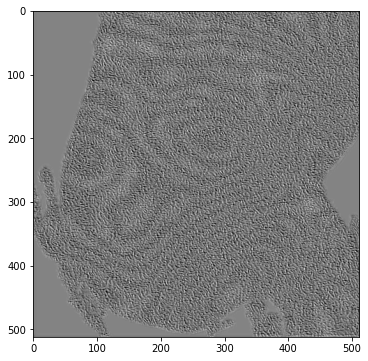

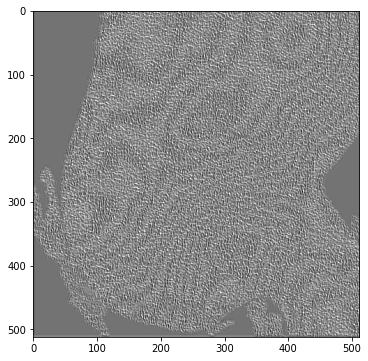

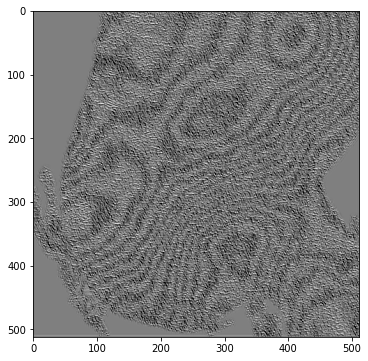

In [55]:
embs = pyramid.get_embeddings(dataset[0]['tgt'], level=1)
print(embs[0].min(), embs[0].max())
v = 0.6
vmin, vmax = -v, v
for e in embs:
    display_image(e, figsize=(6,6), vmin=vmin, vmax=vmax)